In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,  RandomizedSearchCV
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score, mean_squared_error,r2_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score ,mean_squared_error,auc, accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [3]:
#loading data 
df =pd.read_csv("stroke.csv")
#Inforamtion about data 
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Variables info
 - id: unique identifier
 - gender: "Male", "Female" or "Other"
 - age: age of the patient
 - hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
 - heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
 - ever_married: "No" or "Yes"
 - work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
 - Residence_type: "Rural" or "Urban"
 - avg_glucose_level: average glucose level in blood
 - bmi: body mass index
 - smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 - stroke: 1 if the patient had a stroke or 0 if not 
     ***STROKE - target variable 
 
 
 
 
 

 
 

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.drop(["id"] , axis = 1 , inplace = True) #id column does not have effect on our data

In [6]:
df[df['bmi'].notna()]['bmi'].median()

28.1

In [7]:
df['bmi'].fillna(value=df[df['bmi'].notna()]['bmi'].median(),inplace=True) # imput missing values with median 

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
print(df["stroke"].value_counts()/len(df.stroke))

0    0.951272
1    0.048728
Name: stroke, dtype: float64


In [10]:
cat = df.select_dtypes(include = ["object"]).columns  #categorical variables 
cat

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [11]:
num = df.select_dtypes(exclude = ["object"]).columns #integer variables
num

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

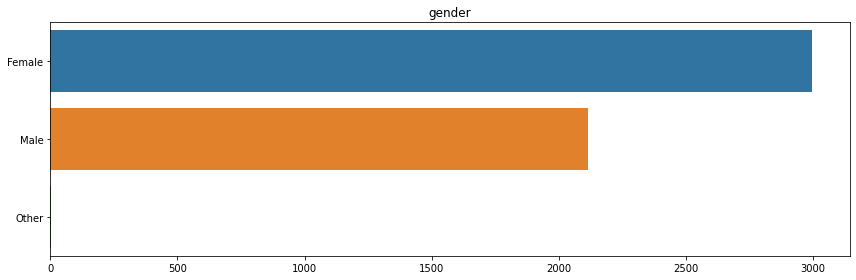

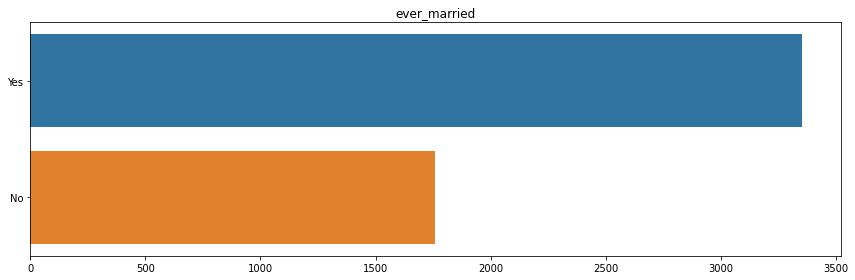

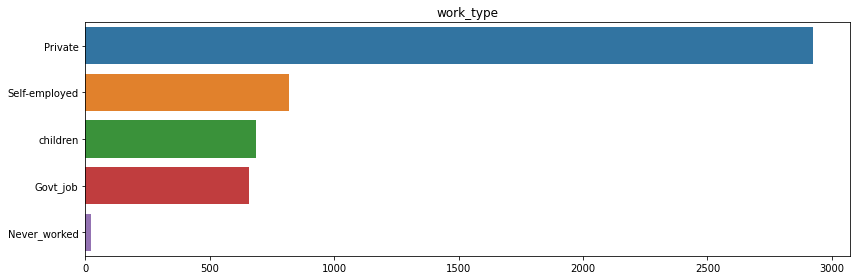

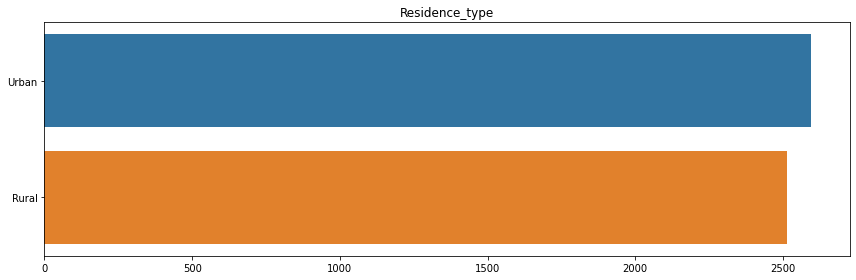

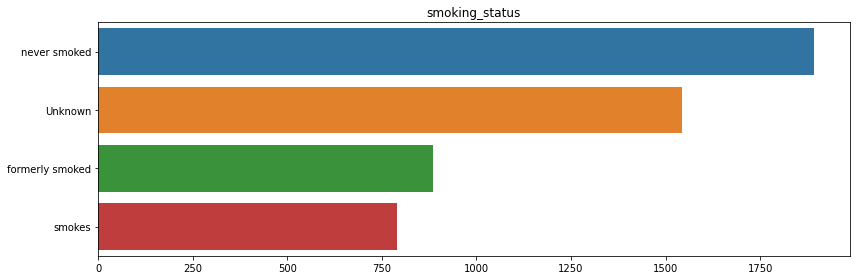

In [12]:
for col in cat:
    plt.figure(figsize=(12,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#### First observation
 - Data is highly imbalanced 95,1% of the observations did not get stroke compare to 4,8% with positive result
 - Female presents majority of observations 
 - Pepople with married status are more common in out data 
 - the highest category of workers is private worker
 - never smoked status is most popular among observations
 - equal distribution of people who live in urban and rural area 

In [13]:
df.groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.799115
1,67.728193,0.265060,0.188755,132.544739,30.090361


 - the avarage age for people, who got stroke is significantly higher (42 vs 68)
 - people with higher glucose level and bmi has higher chance to get stroke 
 - absence of heart_disease and hypertension dicreases the chance for stroke  

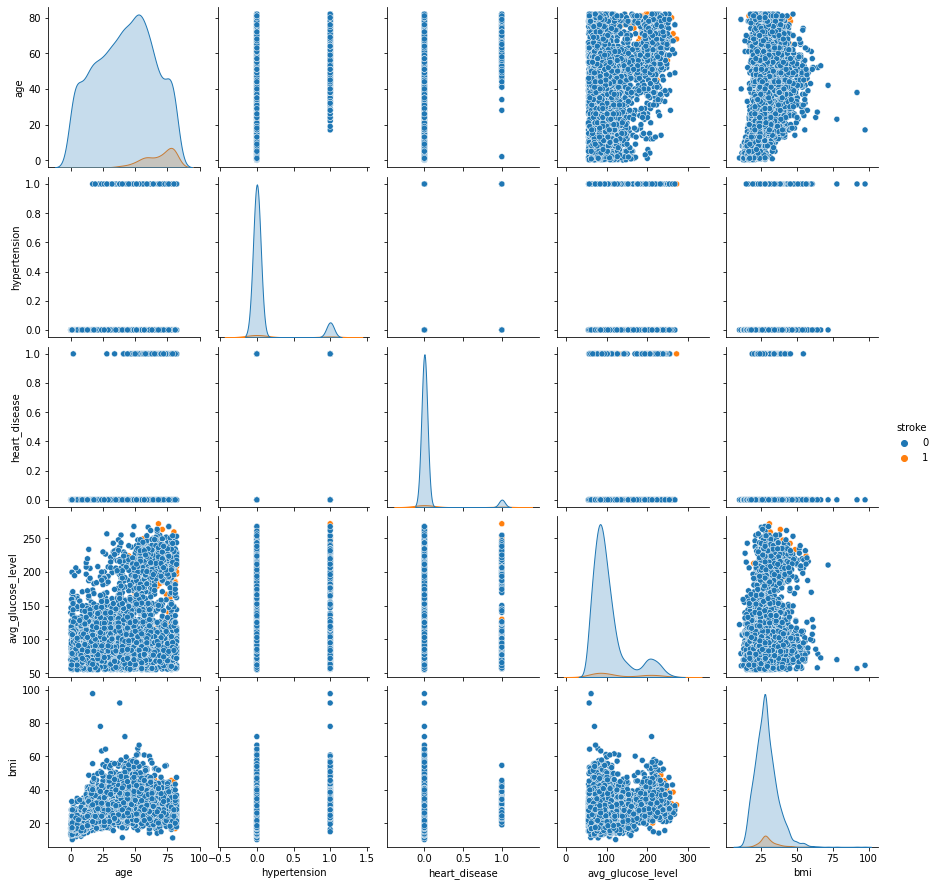

In [14]:
sns.pairplot(df, hue='stroke')

 - for most of our variables our pair plot overlapping a lot 

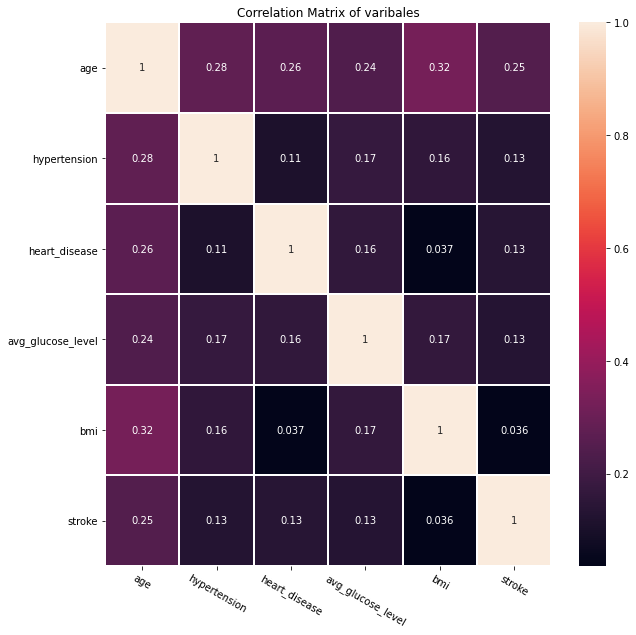

In [15]:
corr_data = df[num]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,linewidths=0.3,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix of varibales')
plt.show()

 - almost all our variables does not have strong correlation 
 - bmi and hypertension have  a positive correaltion with age  

### Oversampling 

In [16]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [17]:
#Upsampling minority class: stroke = 1
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]

df_minority_oversampled = resample(df_minority, replace = True, n_samples=4861, random_state=21)

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

df_oversampled['stroke'].

0    4861
1    4861
Name: stroke, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 249 to 67
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          9722 non-null   object 
 1   age                             9722 non-null   float64
 2   hypertension                    9722 non-null   int64  
 3   heart_disease                   9722 non-null   int64  
 4   ever_married                    9722 non-null   object 
 5   work_type                       9722 non-null   object 
 6   Residence_type                  9722 non-null   object 
 7   avg_glucose_level               9722 non-null   float64
 8   bmi                             9722 non-null   float64
 9   smoking_status                  9722 non-null   object 
 10  stroke                          9722 non-null   int64  
 11  gender_Female                   9722 non-null   uint8  
 12  gender_Male                     97

In [18]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [19]:
df_oversampled = create_dummies(df_oversampled,"gender")
df_oversampled = create_dummies(df_oversampled,"ever_married")
df_oversampled = create_dummies(df_oversampled,"work_type")
df_oversampled = create_dummies(df_oversampled,"Residence_type")
df_oversampled = create_dummies(df_oversampled,"smoking_status")
df_oversampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,...,0,0,0,1,1,0,1,0,0,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,...,0,1,0,0,0,1,0,0,1,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,...,0,1,0,0,0,1,1,0,0,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,...,0,1,0,0,1,0,0,1,0,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,...,1,0,0,0,1,0,1,0,0,0


In [20]:
df_oversampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [22]:
columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']

X = df_oversampled[columns]
y = df_oversampled['stroke']

#### Splitting the data

The idea is to split into a training and test set. The basic principle is that we can train/tune model with training set and test how well it generalizes to data it has never seen before with your test set.

In this case we split model: 80% training set and 20 % testing

In [24]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)

### Tuning model

In [27]:
p_criterion = ['gini', 'entropy']
p_splitter = ['best', 'random']
p_max_depth = [1, 10, 100, 1000]
# The scores will go here
results = []

# Nested loops - we need to test for all combinations
for criterion in p_criterion:
    for splitter in p_splitter:
        for max_depth in p_max_depth:
            # Train the model
            model = DecisionTreeClassifier(
                criterion=criterion,
                splitter=splitter,
                max_depth=max_depth
            )
            model.fit(train_X, train_y)
            preds = model.predict(test_X)
            # Append current results
            results.append({
                'Accuracy': round(accuracy_score(test_y, preds), 5),
                'P_Criterion': criterion,
                'P_Splitter': splitter,
                'P_MaxDepth': max_depth
            })
            
# Convert to Pandas DataFrame and sort descendingly by accuracy
results = pd.DataFrame(results)
results = results.sort_values(by='Accuracy', ascending=False)
results

,Accuracy,P_Criterion,P_Splitter,P_MaxDepth
6,0.97429,gini,random,100
7,0.97121,gini,random,1000
15,0.97069,entropy,random,1000
10,0.96967,entropy,best,100
2,0.96812,gini,best,100
3,0.96761,gini,best,1000
11,0.96710,entropy,best,1000
14,0.96298,entropy,random,100
1,0.92545,gini,best,10
9,0.92339,entropy,best,10


 - the main is to choose  model parameters which give highest accuracy, in our case: gini criteria, random split and max_depth 100  

#### 2nd method (Grid search)

In [29]:
model = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 10, 100, 1000]
}

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  # 10-fold cross validation
    n_jobs=-1  # run in parallel
)
clf.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 100, 1000],
                         'splitter': ['best', 'random']})

In [30]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014059,0.008412,0.003125,0.006251,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.768638,0.778920,...,0.793059,0.751928,0.776350,0.762211,0.795367,0.787645,0.770914,0.774596,0.013666,13
1,0.010943,0.007164,0.003121,0.006242,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.583548,0.614396,...,0.578406,0.609254,0.611825,0.598972,0.716860,0.728443,0.724582,0.649251,0.062065,16
2,0.035932,0.010002,0.003122,0.006245,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.917738,0.937018,...,0.911311,0.892031,0.911311,0.915167,0.930502,0.942085,0.917632,0.919253,0.013618,9
3,0.028115,0.009373,0.004689,0.007163,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.871465,0.868895,...,0.872751,0.821337,0.880463,0.886889,0.894466,0.871300,0.867439,0.875788,0.024170,11
4,0.040615,0.007654,0.006249,0.007653,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.979434,0.973008,...,0.975578,0.967866,0.971722,0.962725,0.989704,0.974260,0.984556,0.974544,0.007830,2


In [31]:
cv_results = cv_results[['mean_test_score', 'param_criterion', 'param_splitter', 'param_max_depth']]
cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_test_score,param_criterion,param_splitter,param_max_depth
6,0.975443,gini,best,1000
4,0.974544,gini,best,100
12,0.974157,entropy,best,100
14,0.973901,entropy,best,1000
7,0.969655,gini,random,1000
5,0.968884,gini,random,100
13,0.968883,entropy,random,100
15,0.967471,entropy,random,1000
2,0.919253,gini,best,10
10,0.918738,entropy,best,10


- According to this method, best parameters will be gini, split-best and max_depth 1000

In [34]:
#anothe way to find best parameters
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(train_X, train_y)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 1}
Best score: 0.8486923482778692


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - Using this method we received not the best results 

In [37]:
model_dt = DecisionTreeClassifier(max_depth = 100, criterion ="gini")
model_dt.fit(train_X, train_y)
pred_dt_y = model_dt.predict_proba(test_X)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(test_y, pred_dt_y)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [40]:
#ada
model_ada = AdaBoostClassifier(n_estimators = 120)
model_ada.fit(train_X, train_y)
pred_ada_y = model_ada.predict_proba(test_X)[:, 1]

fpr_ada, tpr_ada, _  = roc_curve(test_y, pred_ada_y)
roc_auc_ada = auc(fpr_ada, tpr_ada)

In [42]:
#random forest
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 120)
model_rf.fit(train_X, train_y)
pred_rf_y = model_rf.predict_proba(test_X)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y, pred_rf_y)
roc_auc_rf = auc(fpr_rf, tpr_rf)
predictions = model_rf.predict(test_X)
print (model_rf.score(test_X, test_y))
actual_result_y = test_y[0]

0.9321336760925449


In [45]:
#bayes
model_bayes = svm.SVC()
model_bayes.fit(train_X, train_y)
pred_bayes_y = model_bayes.fit(train_X, train_y).decision_function(test_X)

fpr_bayes, tpr_bayes, _= roc_curve(test_y, pred_bayes_y)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

ROC_AUC Score: 0.9913793103448276
[[959  17]
 [  0 969]]


<AxesSubplot:>

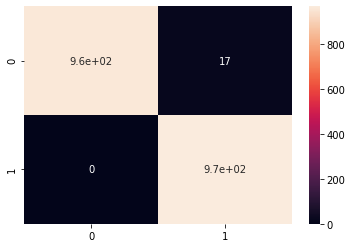

In [58]:
randomforest = RandomForestClassifier(max_depth = 100, n_estimators = 200)
randomforest.fit(train_X, train_y)
pred_y = randomforest.predict(test_X)

AUC_RF=roc_auc_score(pred_y,test_y)
acc_rf=accuracy_score(test_y,pred_y)
recall_rf=recall_score(test_y,pred_y)
precision_rf=precision_score(test_y,pred_y)
f1score_rf=f1_score(test_y,pred_y)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(test_y,pred_y)
print(cm)

sns.heatmap(cm,annot=True)

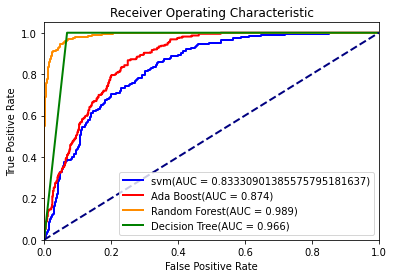

In [59]:
#ROC



plt.figure(1)
lw = 2
plt.plot(fpr_bayes, tpr_bayes, color='blue',
         lw=lw, label='svm(AUC = %0.23f)' % roc_auc_bayes)
plt.plot(fpr_ada, tpr_ada, color='red',
         lw=lw, label='Ada Boost(AUC = %0.3f)' % roc_auc_ada)
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=lw, label='Random Forest(AUC = %0.3f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

*According to the results presented in this part we may say that Random Forest and Decision tree show nice results, but Ada Boost model and svm model can be also used due to high roc_auc_score;

**The model with highest roc_auc_score is consider as a best model and here it is Random forest

### Feature selection 

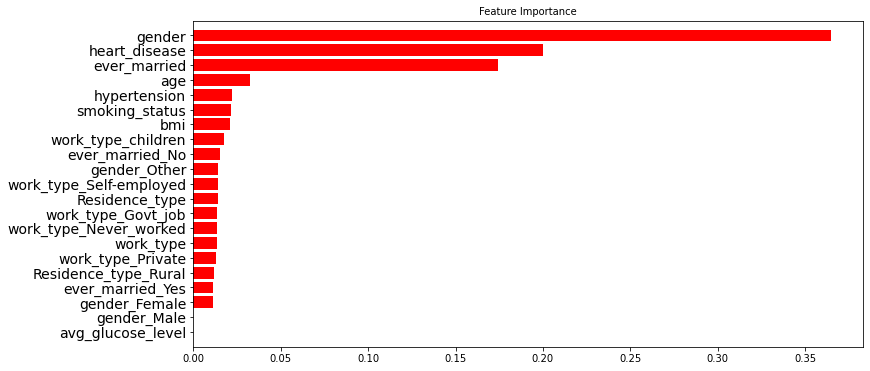

In [62]:
clf = RandomForestClassifier(max_depth = 100, n_estimators = 200)
clf.fit(train_X, train_y)
importances = clf.feature_importances_
feature_names = df_oversampled.drop('stroke', axis=1).columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='r',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

#### Important feautures
 - gender has the biggest impact on our target variable stroke 
 - intrestingly that married status also has high impact on our model
 - also health parameters such as heart disease, smoking_status, age, bmi and hypertension have impact on our model.

### Conclusion 

 - It was intresting experience to work with dataset!
 - There are several findings which can be important in terms of explanation stroke probabilty : bmi and hypertension have a positive correaltion with age, also this variables are in the top of our feature selection. 
 - In terms of the model, I choose Random Forest model, which shows 98,9% of Accuracy also I showed the most important variables of this model
 - In terms of possible shortcoming of this model, I can assume that this model is  biased while dealing with categorical variables. Also it is important to mention, that due to the lack of skills in tuning, this and another models could provide better results 
 